--------------------

# Проект: развлекательное приложение  Procrastinate Pro+

### Цель

Выявить причины убыточности в последнии месяцы, несмотря на огромные вложения в рекламу.

#### План

- Провести исследовательский анализ данных:

    - Создать профиль пользователя
    - Выявить страны в которых живуут клиенты
    - Определеить с каких устройств клиенты заходят в пиложение
    - Определить рекламные источники задействованные в привлечении новых клиентов
    
    
- Выявить сумму расходов на маркетинг

- Посчитать затраты на рекламные кампании

- Визуализировать метрики удержания пользователей, CAC, LTV, ROI

- Написать выводы

- Дать рекомендации

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Загружу необходимые для работы библиотеки

In [138]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [139]:
try:
    visits = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/7_анализ_бизнес_показателей')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    
try:
    orders = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/7_анализ_бизнес_показателей')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')

try:
    costs = pd.read_csv('/Users/alig/Desktop/portfolio/yandex_curses/7_анализ_бизнес_показателей')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

#### Ознакомлюсь с данными и проведу предобработку в датафреймах

##### VISITS

`Структура таблицы`

`Структура таблицы`

* `user_id` — уникальный идентификатор пользователя
* `region` — страна пользователя
* `device` — тип устройства пользователя
* `channel` — идентификатор источника перехода
* `session_start` — дата и время начала сессии
* `session_end` — дата и время окончания сессии

In [213]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

`Приведу названия колонок к общему формату и нижнему регистру`

In [141]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits.head(0)

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

In [142]:
visits.head(0)

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

`Выведу общую информацию таблицы`

In [143]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


`Проверю количество пропусков`

In [144]:
pd.DataFrame(round(visits.isna().mean()*100,)).style.background_gradient('coolwarm')

`Пропусков нет. Приведу колонки с датами и временем к нужному типу.`

In [145]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [146]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


`Проверю на дубликаты`

In [147]:
visits.duplicated().sum()

0

##### ORDERS

`Структура таблицы`

* `user_id` — уникальный идентификатор пользователя
* `event_dt` — дата и время покупки
* `revenue` — сумма заказа

In [148]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

`Приведу названия колонок к общему формату и нижнему регистру`

In [149]:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders.head(0)

Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []

`Выведу общую информацию таблицы`

In [150]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


`Проверю количество пропусков`

In [151]:
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('coolwarm')

`Пропусков нет. Приведу колонку с датой и временем к нужному типу`

In [152]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [153]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


`Проверю на дубликаты`

In [154]:
orders.duplicated().sum()

0

##### COSTS

`Структура таблицы`

* `dt` — дата проведения рекламной кампании
* `channel` — идентификатор рекламного источника
* `costs` — расходы на эту кампанию

In [155]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

`Приведу названия колонок к общему формату и нижнему регистру`

In [156]:
costs.columns = ['dt', 'channel', 'costs']
costs.head(0)

Empty DataFrame
Columns: [dt, channel, costs]
Index: []

`Выведу общую информацию таблицы`

In [157]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


`Проверю количество пропусков`

In [158]:
pd.DataFrame(round(costs.isna().mean()*100,)).style.background_gradient('coolwarm')

`Пропусков нет. Приведу колонку с датой к нужному типу`

In [159]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [160]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


`Проверю на дубликаты`

In [161]:
costs.duplicated().sum()

0

#### Вывод по разделу

- Названия в таблицах имеют общий стиль и приведены к нижнему регистру
- Столбца с датами и временем приведены в нужный формат `datetime64`, столбец в котором была только дата, приведен в формат `date`
- Пропуски не обнаруженны
- Дубликаты отсутствуют

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [162]:
visits.head(1)

user_id         region  device  channel       session_start  \
0  981449118918  United States  iPhone  organic 2019-05-01 02:36:01   

          session_end  
0 2019-05-01 02:45:01

In [163]:
orders.head(1)

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99

In [164]:
costs.head(1)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3

#### get_profiles - создание профилей пользователей

In [165]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### get_retention - для подсчёта Retention Rate

In [166]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### get_conversion — для подсчёта конверсии

In [167]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_ltv — для подсчёта LTV и ROI

In [168]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для визуализации метрик

##### filter_data — для сглаживания данных

In [169]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

##### plot_retention — для построения графика Retention Rate

In [170]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### plot_conversion — для построения графика конверсии

In [171]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### plot_ltv_roi — для визуализации LTV и ROI

In [172]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [173]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [174]:
print('Мнимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Мнимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [175]:
profiles['user_id'].count().sum()

150008

##### Вывод

Создана переменная **profiles** с профилями пользователей

    Структура таблицы:
    - user_id - уникальный идентификатор пользователя
    - first_ts - дата и время первого посещения
    - channel - канал привлечения пользователя
    - device - тип устройства пользователя
    - region - страна пользователя
    - dt - дата первого посещения
    - month - первый день месяца первого посещения
    - payer - признак платящего пользователя
    - acquisition_cost - стоимость привлечения пользователя
    
- Мнимальная дата привлечения пользователей: 2019-05-01

- Максимальная дата привлечения пользователей: 2019-10-27

- Количество уникальных пользователей: 150008

- Момент анализа данных: 2019-11-01. Это подтверждает, что предоставленная информация (за период с 2019-05-01 по 2019-10-27) актуальная и приближена к началу момента анализа данных.

#### Страны 

##### Кол-во стран, пользователей и платящих пользлователей

In [176]:
region_users = profiles.groupby('region')['user_id', 'payer']\
.agg({'user_id': 'count', 'payer':'sum'}).sort_values(by='user_id', ascending=False)
region_users.head()

/var/folders/91/d9d24bsn2nsc8wq1zngs8mp80000gn/T/ipykernel_99629/2406003867.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_users = profiles.groupby('region')['user_id', 'payer']\


user_id  payer
region                       
United States   100002   6902
UK               17575    700
France           17450    663
Germany          14981    616

##### Процентное соотношение платящих пользователей 

In [177]:
region_users['payers_%'] = region_users['payer'] / region_users['user_id'] * 100
region_users.style.format({'payers_%': '{:.2}%'})

##### Вывод

Создана переменная **region_users**, отражающая количество пользователей и долю платящих из каждой страны. 

- Пользователи приходят в приложение из 4-х стран: 

    - США - **100002** пользлователей
    - Великобритания - **17575** пользователей
    - Франция - **17450** пользователей
    - Германия - **14981** пользователей
    
    
- Доля платящих пользователей по странам: 

    - США - **6.9%**
    - Германия - **4.1%**
    - Великобритания - **4.0%**
    - Франция - **3.8%**
    
    
- Примечательно, что у Германии меньше пользователей, чем в других странах, но по количество платящих клиентов, страна занимает второе место, после США. В дальнейшем, возможно, имеет смысл сделать упор на рынок Германии.

#### Устройства 

Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

##### Устройства, кол-во пользователей по устройствам, платящие пользлователи

In [178]:
device_users = profiles.groupby('device')['user_id', 'payer']\
.agg({'user_id': 'count', 'payer':'sum'}).sort_values(by='user_id', ascending=False)
device_users.head()

/var/folders/91/d9d24bsn2nsc8wq1zngs8mp80000gn/T/ipykernel_99629/214550165.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  device_users = profiles.groupby('device')['user_id', 'payer']\


user_id  payer
device                 
iPhone     54479   3382
Android    35032   2050
PC         30455   1537
Mac        30042   1912

##### Процентное соотношение платящих пользователей

In [179]:
device_users['payers_%'] = device_users['payer'] / device_users['user_id'] * 100
device_users.style.format({'payers_%': '{:.2}%'})

##### Вывод

Создана переменная **device_users**, отражающую количество пользователей и долю платящих для каждого устройства.

- Устройства и кол-во клиентов:

    - iPhone - **54479** пользователя
    - Android - **35032** пользователя
    - PC - **30455** пользователя
    - Mac - **30042** пользлователя
        
Чаще всего, клиенты используют IPhone. Приблизительно одинаковое кол-во клиентов пользуются PC и Mac.

- Процентное соотношение платящих клиентов:

    - iPhone - **6.2%**
    - Android - **5.9%**
    - PC - **5.0%**
    - Mac - **6.4%**
    
Примечательно, что платящих клиентов, которые используют Mac, на **1.4%** больше, чем тех, кто пользуется PC. 

####  Рекламные источники

##### Кол-во источников, пользователей и платящих пользователей

In [180]:
channels_users = profiles.groupby('channel')['user_id', 'payer']\
.agg({'user_id': 'count', 'payer':'sum'}).sort_values(by='user_id', ascending=False)
channels_users

/var/folders/91/d9d24bsn2nsc8wq1zngs8mp80000gn/T/ipykernel_99629/357428188.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  channels_users = profiles.groupby('channel')['user_id', 'payer']\


user_id  payer
channel                           
organic               56439   1160
FaceBoom              29144   3557
TipTop                19561   1878
OppleCreativeMedia     8605    233
LeapBob                8553    262
WahooNetBanner         8553    453
RocketSuperAds         4448    352
MediaTornado           4364    156
YRabbit                4312    165
AdNonSense             3880    440
lambdaMediaAds         2149    225

##### Процентное соотношение платящих пользователей¶

In [181]:
channels_users['payers_%'] = round(channels_users['payer'] / channels_users['user_id'] * 100)
channels_users.sort_values(by='payers_%', ascending=False).style.format({'payers_%': '{:.3}%'})

In [182]:
profiles['channel'].nunique()

11

##### Вывод

Создана переменная **channels_users**, отражающая количество пользователей и долю платящих для каждого канала привлечения.

Канал "organic" - это пользователи, которые сами пришли/нашли приложение, т.е. пользователи не привлеченные рекламными интеграциями. 

- Выведу список из 5 самых активных каналов привлечения:
        
    - FaceBoom - **29144**	
    - TipTop - **19561**	
    - OppleCreativeMedia - **8605**
    - LeapBob - **8553**	
    - WahooNetBanner - **8553**
    
    
- Процентное соотношенеи платящих клиентов: 

    - FaceBoom - **12.0%**
    - AdNonSense - **11.0%**
    - TipTop - **10.0%**
    - lambdaMediaAds - **10.0%**
    - RocketSuperAds - **8.0%**
    
Процент платящих пользователей привлеченных остальными каналами варьируется от 5% до 2%. 

Всего каналов привлечения - 11

#### Вывод по разделу

- Составлен профиль пользователей
- Выявлены клиенты из каких стран приходят в приложение посчитано количество пользлователей, также кол-во платящих пользователей в каждой стране
- Выявлены какими устройствами пользуются клиенты. Посчитано кол-во пользвоталей и доля платящих пользователей по каждому типу устройства
- Выявлены источники привлечения клиентов в приложение. Так же расчитана доля платящих пользоватлей, привлеченных каждым рекламным источником.

`Пользователи приходят в приложение из 4-х стран:`

- США - 100002 пользователей
- Великобритания - 17575 пользователей
- Франция - 17450 пользователей
- Германия - 14981 пользователей

`Доля платящих пользователей по странам:`

- США - 6.9%
- Германия - 4.1%
- Великобритания - 4.0%
- Франция - 3.8%

`Устройства и кол-во клиентов:`

- iPhone - 54479 пользователя
- Android - 35032 пользователя
- PC - 30455 пользователя
- Mac - 30042 пользлователя

`Процентное соотношение платящих клиентов:`

- iPhone - 6.2%
- Android - 5.9%
- PC - 5.0%
- Mac - 6.4%

`Выведу 5 самых активных каналов привлечения:`

- FaceBoom - 29144
- TipTop - 19561
- OppleCreativeMedia - 8605
- LeapBob - 8553
- WahooNetBanner - 8553

`Процентное соотношенеи платящих клиентов:`

- FaceBoom - 12.0%
- AdNonSense - 11.0%
- TipTop - 10.0%
- lambdaMediaAds - 10.0%
- RocketSuperAds - 8.0%

Процент платящих пользователей привлеченных остальными каналами варьируется от 5% до 2%.

Количество клиентов из канала "organic" составляет **56439**. Основная масса клиентов, приходит в приложение без привлечения рекламных ингерцаий. Но и показатель платящих клиентов в этом канале самый низкий, что не удивительно. Однако, количество платящих пользователей из канала "organic" (**1160**) значительно превышает все каналы привлечения клеинтов, кроме канала "TipTop"(**1878**) и "FaceBoom"(**3557**)

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [183]:
round(costs['costs'].sum())

105497

#### Затраты на каждый источник

In [184]:
costs.head(2)

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

In [185]:
total_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
total_costs

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

#### Визуализация динамики изменения расходов во времени

In [186]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


##### Добавлю в таблицу столбцы с номером месяца и номером недели

In [187]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.date
costs['week'] = costs['dt'].astype('datetime64[W]').dt.date
costs.head()

dt   channel  costs       month        week
0  2019-05-01  FaceBoom  113.3  2019-05-01  2019-04-25
1  2019-05-02  FaceBoom   78.1  2019-05-01  2019-05-02
2  2019-05-03  FaceBoom   85.8  2019-05-01  2019-05-02
3  2019-05-04  FaceBoom  136.4  2019-05-01  2019-05-02
4  2019-05-05  FaceBoom  122.1  2019-05-01  2019-05-02

##### Строю график динамики изменения расходов 

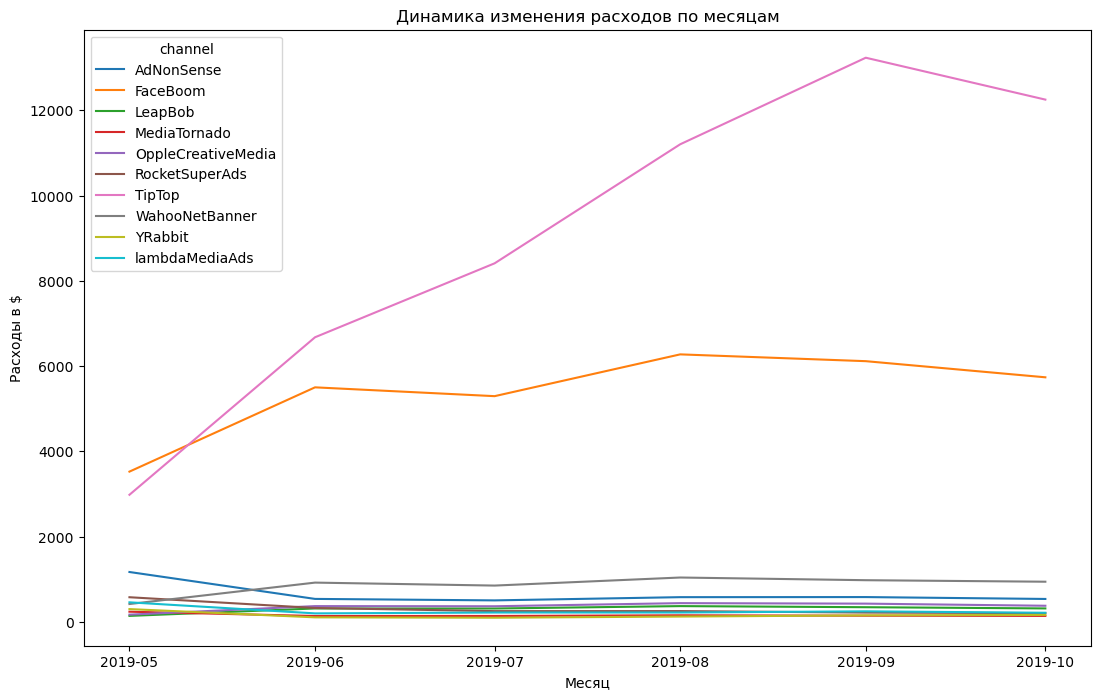

In [188]:
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(figsize=(13, 8))
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы в $')
plt.show()

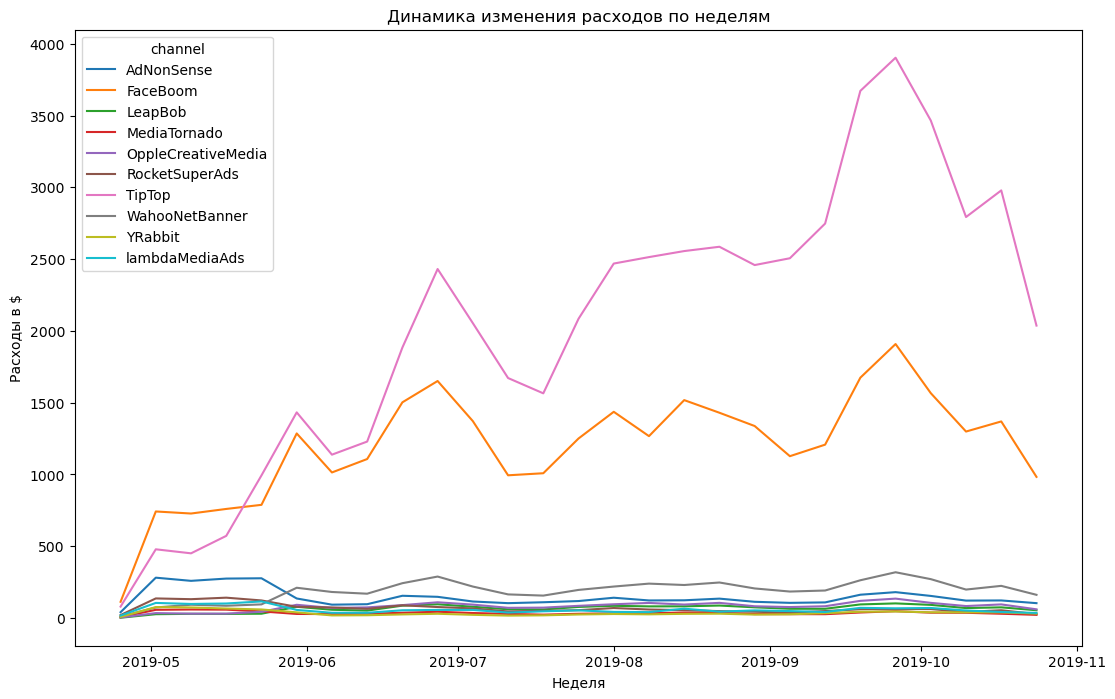

In [189]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(figsize=(13, 8))
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы в $')
plt.show()

#### Средняя стоимость привлечения одного пользователя (САС)

`Из расчета сразу канал "organic", т.к. затрат на их привлечение не было`

In [190]:
profiles.head(1)

user_id            first_ts   channel device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom    Mac  United States  2019-05-07   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172

In [191]:
mean_cac = round(profiles.query('channel != "organic"')\
                 .groupby('channel')['acquisition_cost'].mean(), 2)\
                .sort_values(ascending=False)
mean_cac

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
Name: acquisition_cost, dtype: float64

#### Выводы по разделу

- Общая сумма расходов на рекламу составила **105497$**
- Затраты на рекламу по каждому из источников:

    - TipTop - **54751.30**
    - FaceBoom - **32445.60**
    - WahooNetBanner - **5151.00**
    - AdNonSense - **3911.25**
    - OppleCreativeMedia - **2151.25**
    - RocketSuperAds - **1833.00**
    - LeapBob - **1797.60**
    - lambdaMediaAds - **1557.60**
    - MediaTornado - **954.48**
    - YRabbit - **944.22**
    
- Большая часть маркетинговый затрат в каналах **TipTop** и **FaceBoom**

Средняя стоимость привлечения одного клиента в канале **TipTop - 2.80**, **FaceBoom - 1.11**, **AdNonSense - 1.01**

По остальным каналам средняя стоимость варьируется от 0.72 до 0.21

****Показатели в долларах США***

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Момент и горизонт анализа

`Момент анализа`

In [192]:
observation_date = datetime(2019,11,1).date()

`Горизонт анализа`

In [193]:
analysis_horizon = 14

Исключу канал "organic" из профилей пользователей для последующего анализа, т.к. органические пользователи изначально приходят в бизнес бесплатно. Поэтому рассматривать их с точки сзрения окупаемости не совсем верно. 

In [194]:
profiles = profiles.query('channel != "organic"')

#### Графики окупаемости рекламы LTV ROI

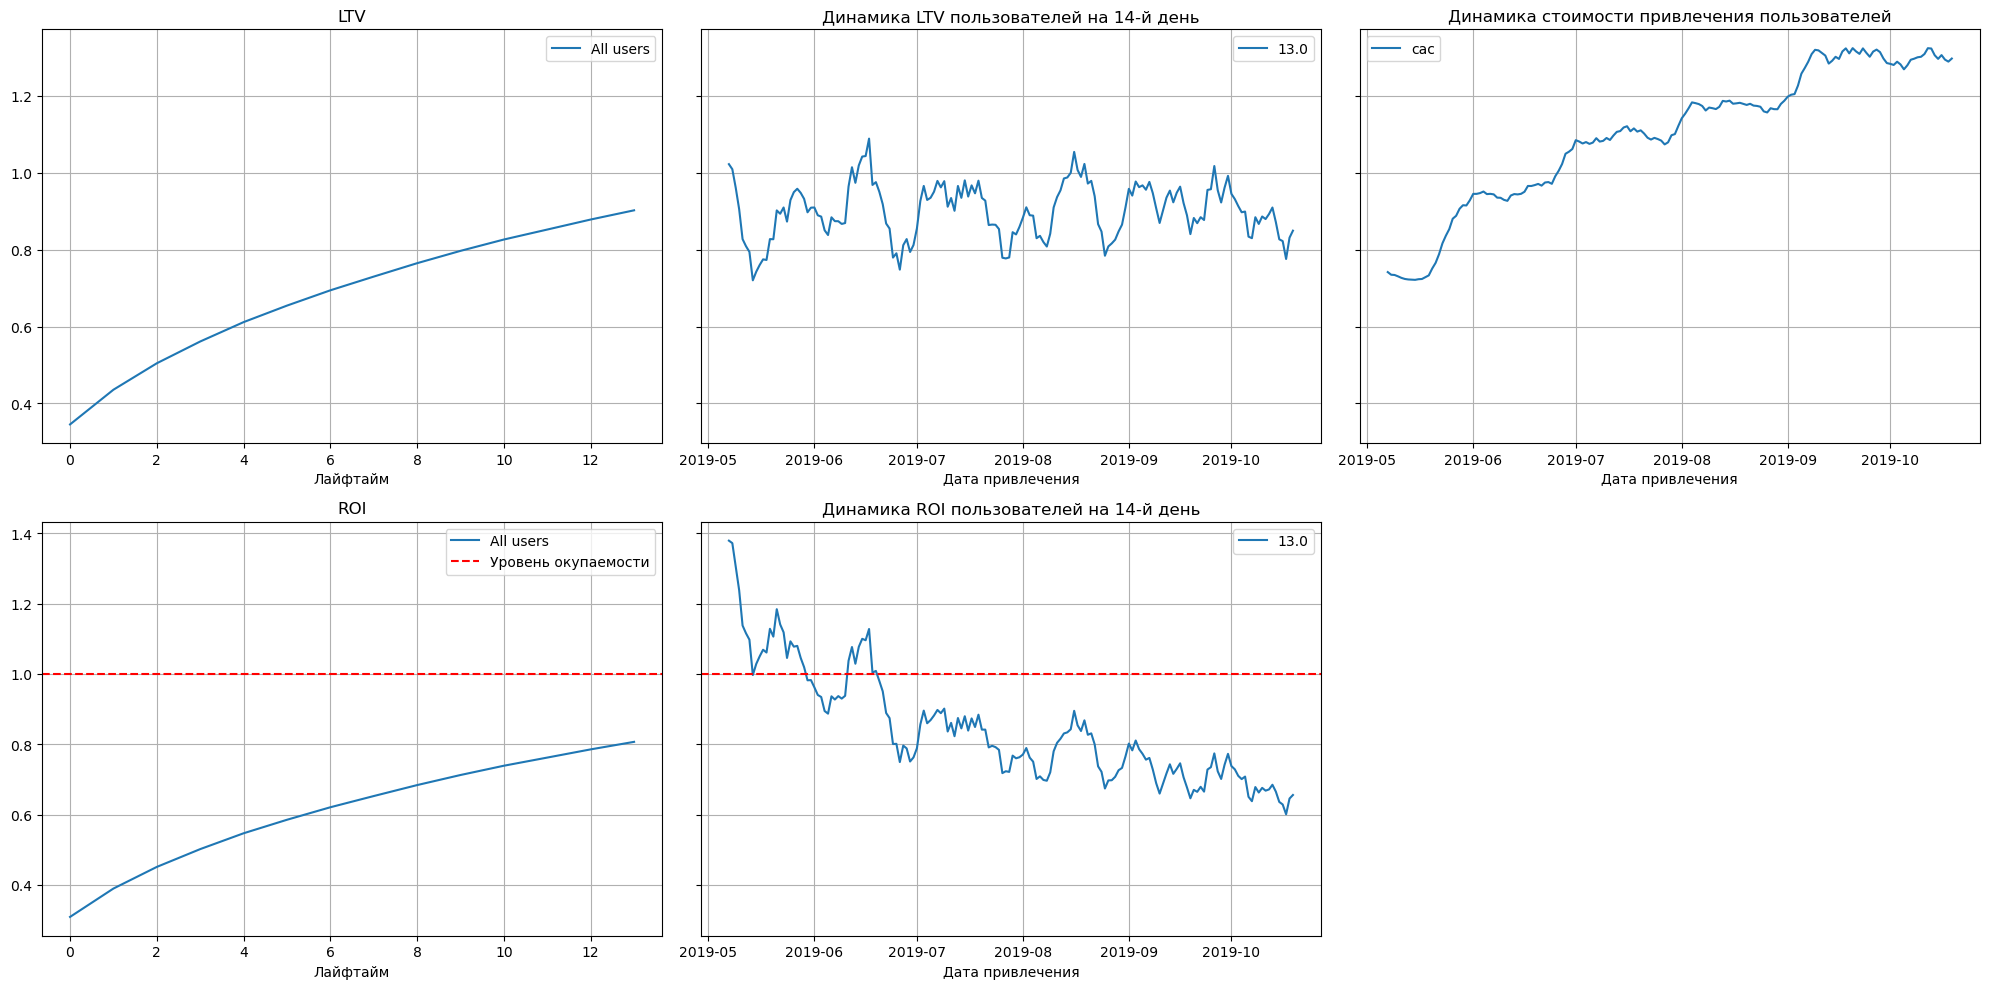

In [195]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

##### Промежуточный вывод
1. Реклама не окупается, к концу исследуемого периода ROI только приближался к 100%. ROI падает, т.к. растет привлечение.
2. CAC (стоимость привлечения клиента) - увеличивается по всему исследуемому периоду. Соответственно увеличиваются затраты на маркетинг.
3. LTV (пожизненная ценность клиента) - возможно подвержен сезонности, но на всем периоде достаточно стабилен.

#### Общая окупаемость пользователей и динамика без разбвки

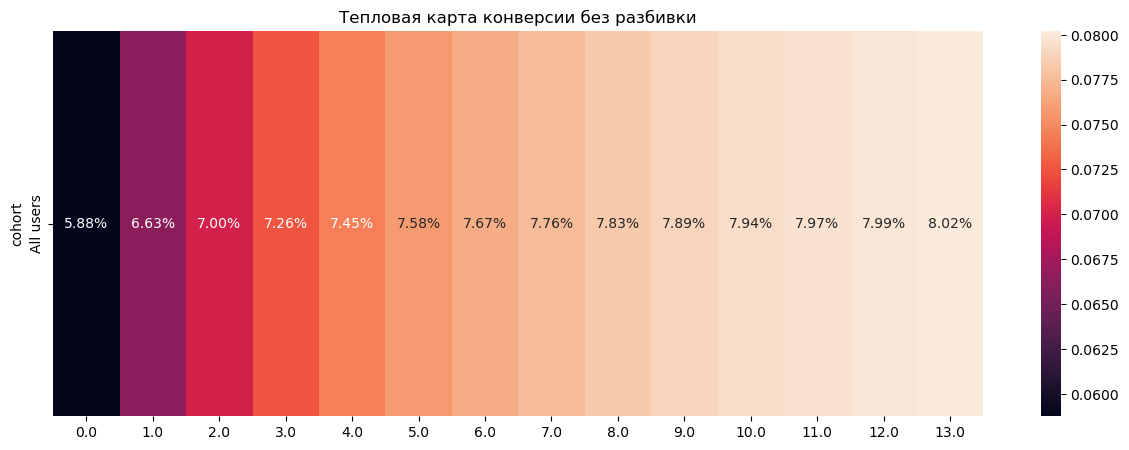

In [196]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии без разбивки')
plt.show() 

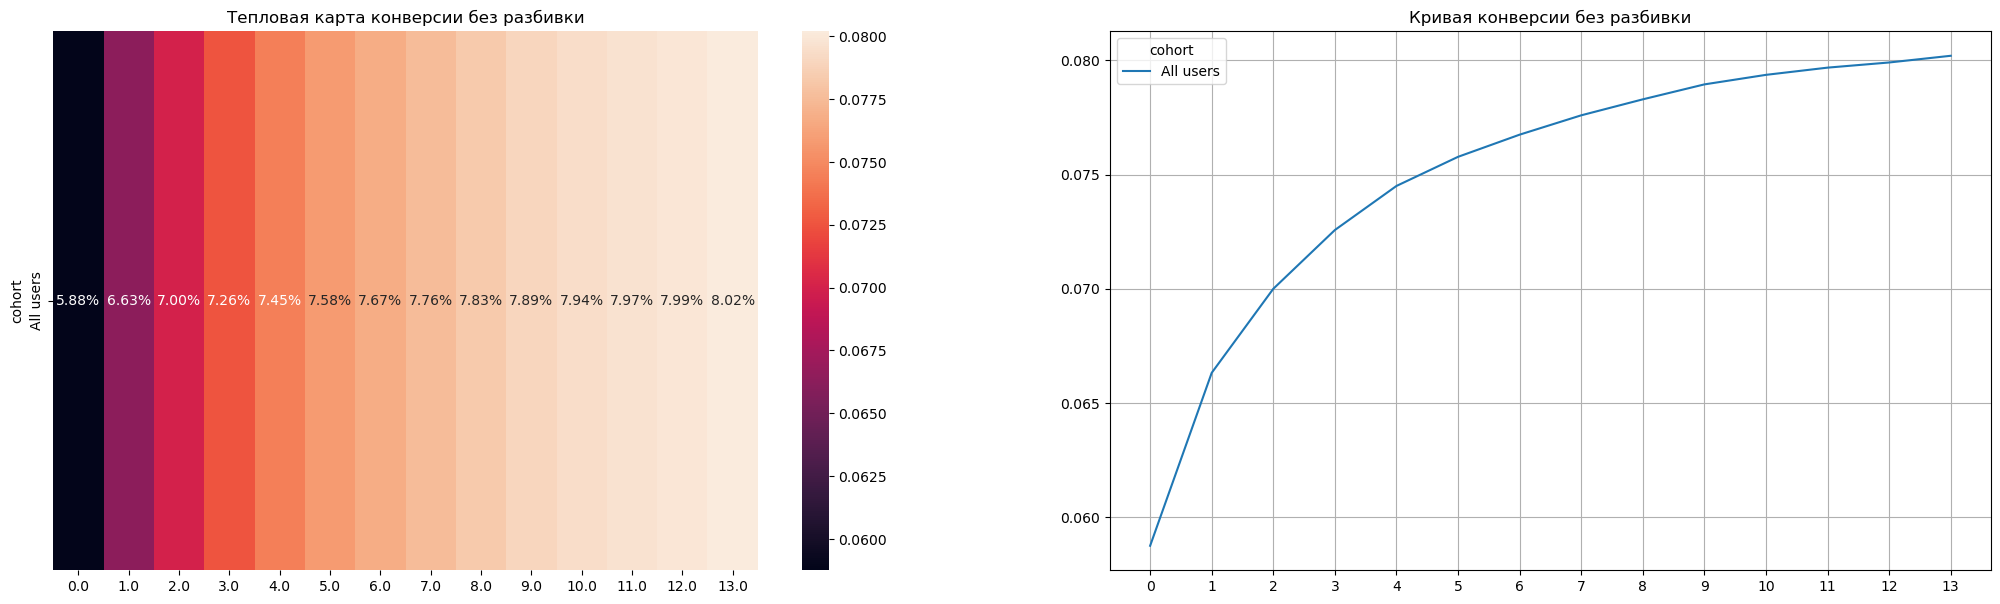

In [197]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plt.figure(figsize = (25, 7)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии без разбивки')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривая конверсии без разбивки')

plt.show() 

##### Промежуточный вывод
В целом, конверсия растет. С 5.88% в первый день исследуемого периода, до 8.02% в последний день.

#### Окупаемость по устройствам

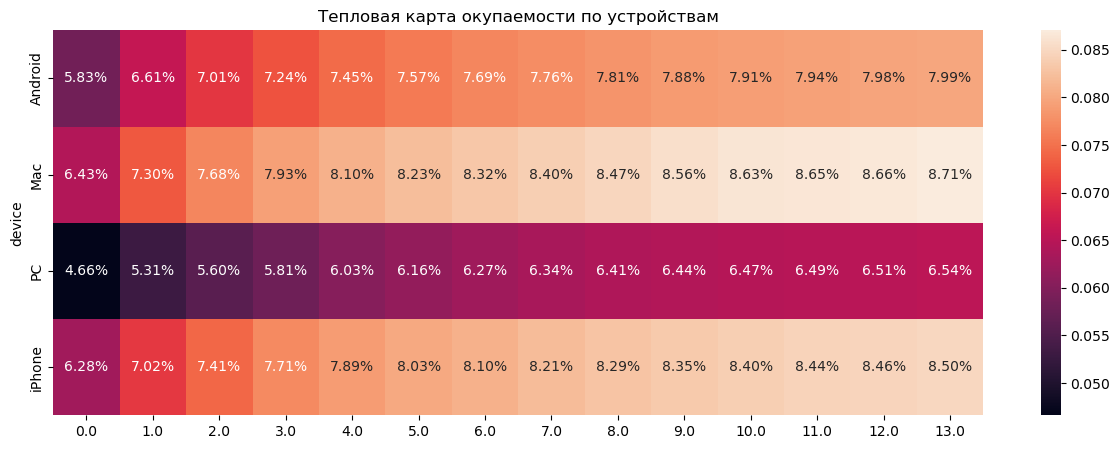

In [198]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта окупаемости по устройствам')
plt.show() 

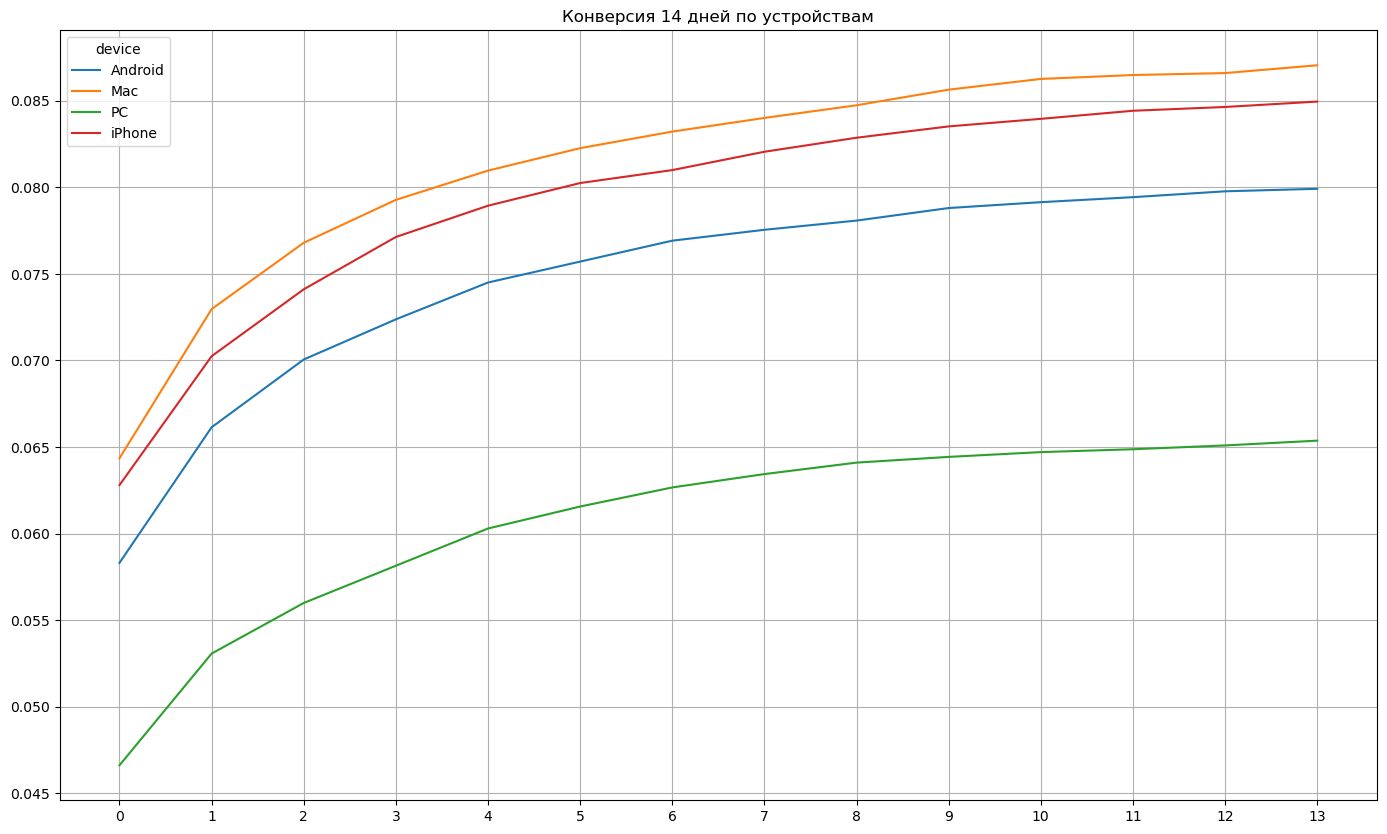

In [199]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)


report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(17, 10), xticks=list(report.columns.values)
)
plt.title('Конверсия 14 дней по устройствам')

plt.show() 

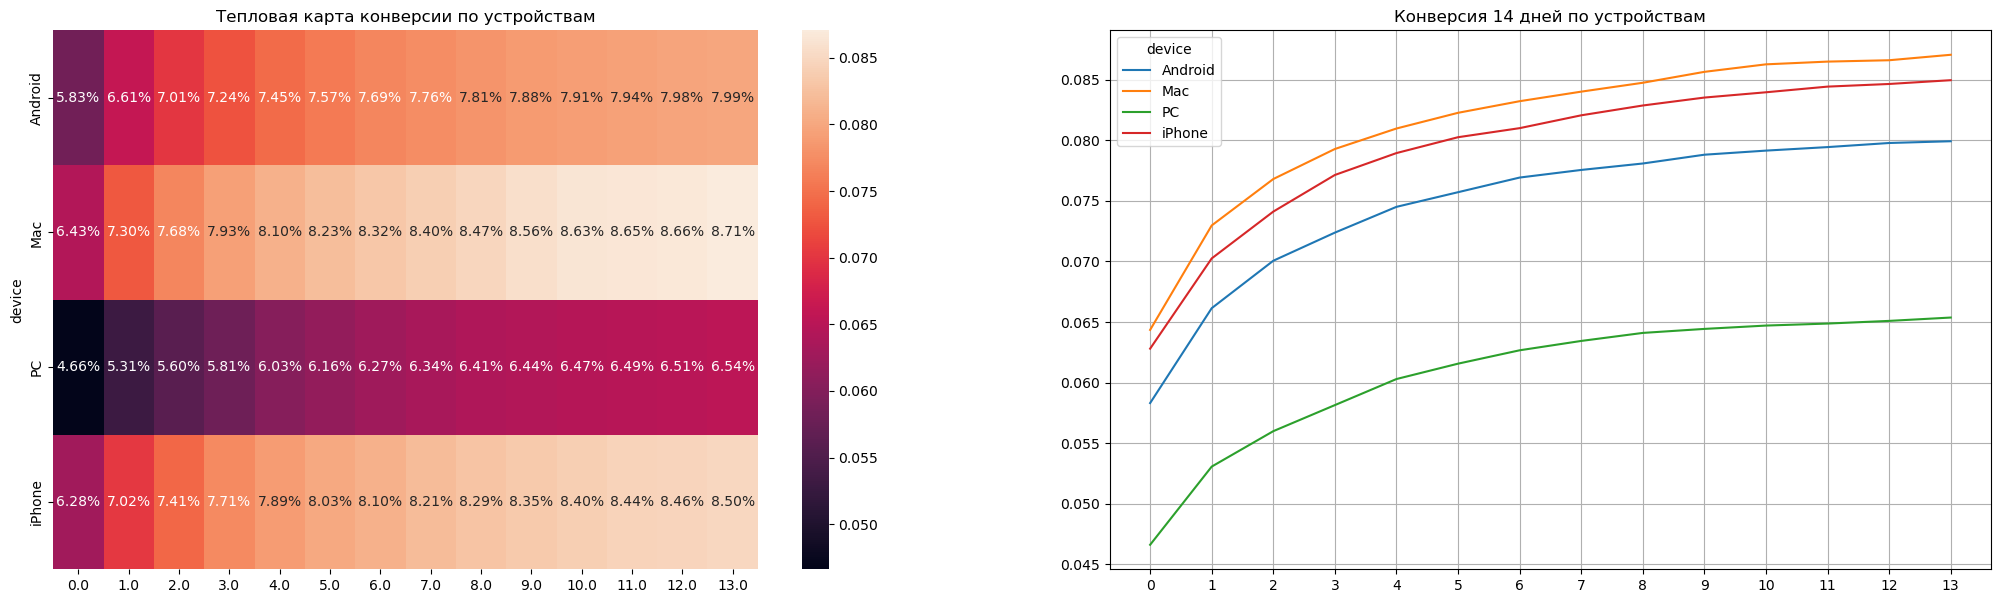

In [200]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plt.figure(figsize=(25, 7)) # размер сетки для графиков

report = conversion.drop(columns=['cohort_size'])

sns.heatmap(
    conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)
plt.title('Тепловая карта конверсии по устройствам')

# для кривых конверсии исключаем размеры когорт

report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Конверсия 14 дней по устройствам')

plt.show() 

##### LTV, CAC, ROI

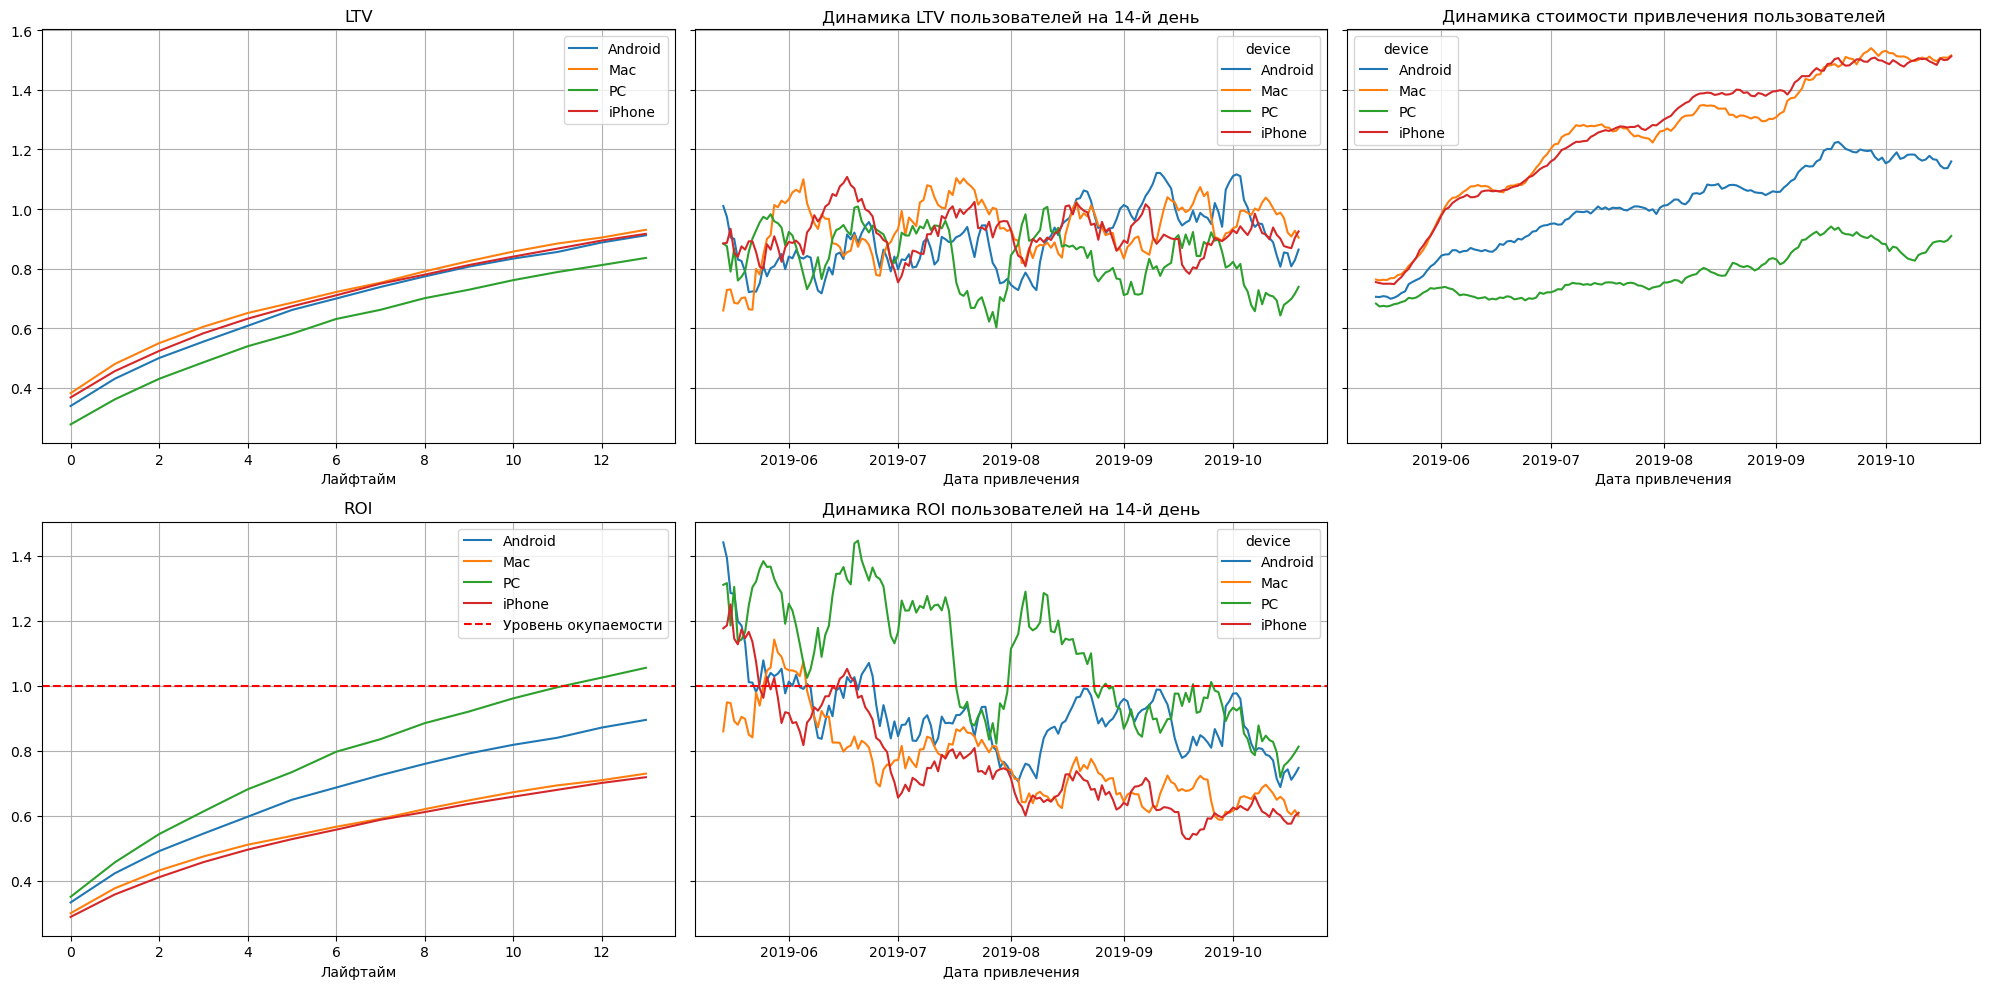

In [201]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)
plt.figsize=(20, 7)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

При этом стоит помнить, что основная масса пользователей США используют технику apple.

##### Удержание по устройствам

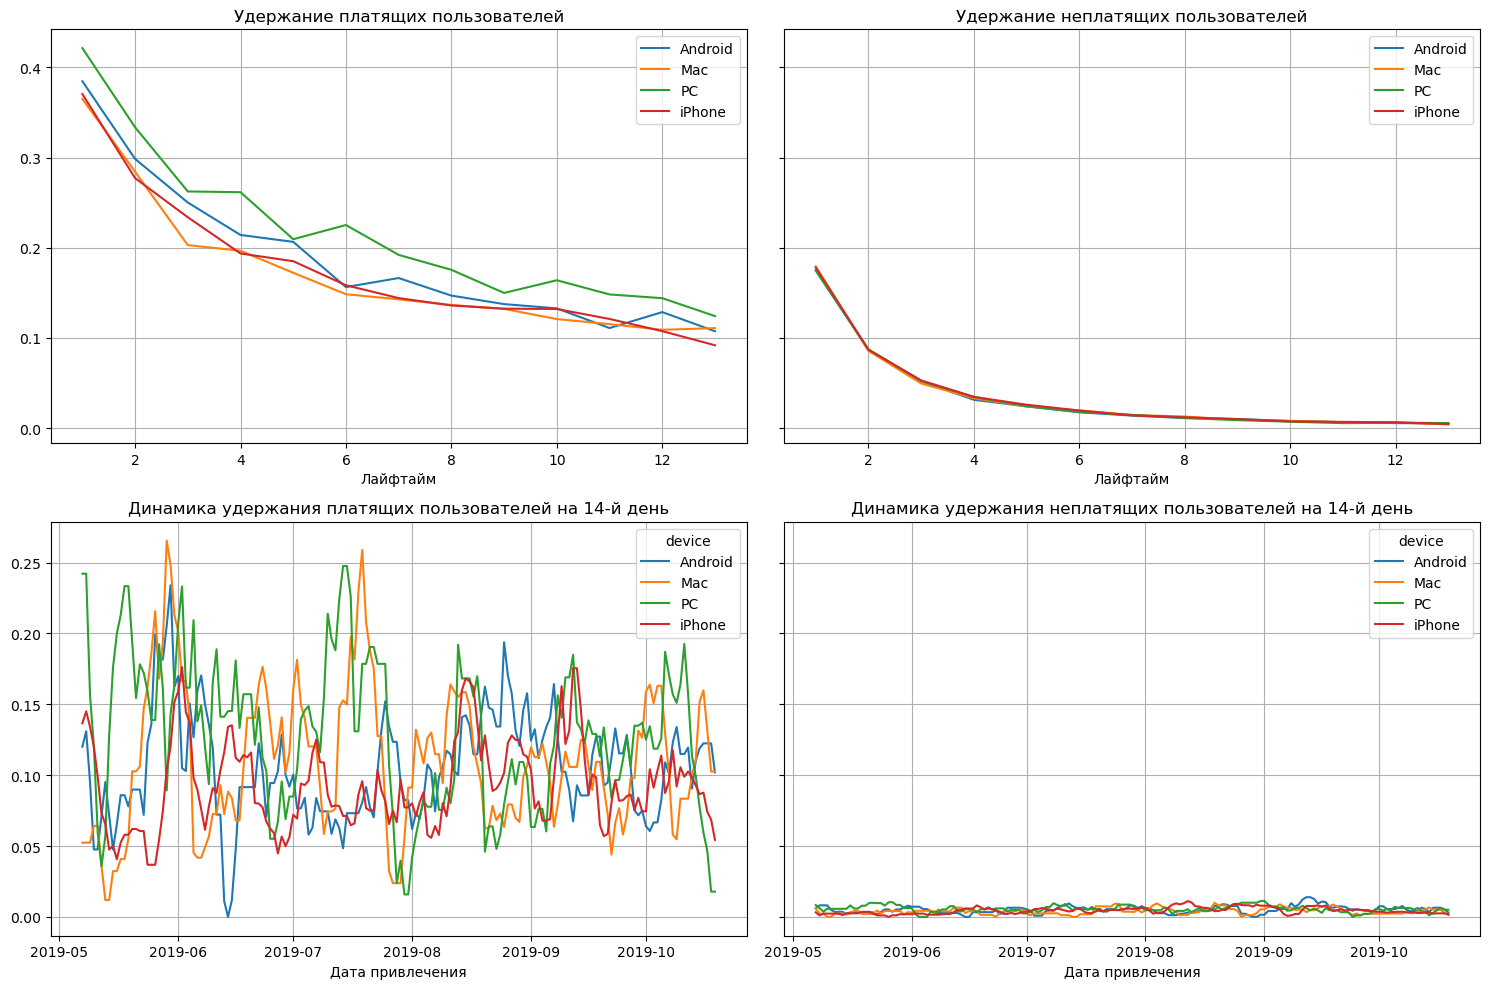

In [202]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

##### Промежуточный вывод

1. Клиенты используют 4 вида устройств для входа в приложение:
    - IPhone
    - Andriod
    - PC
    - Mac
2. Конверсия устрйоств за исследуемый период: 
    - IPhone: 6.28% новых клиентов в первый день, 8.50% в последний день
    - Andriod: 5.83% новых клиентов в первый день, 7.99% в последний день
    - PC: 4.66% новых клиентов в первый день, 6.54% в последний день
    - Mac: 6.43% новых клиентов в первый день, 8.71% в последний день
    
Конверсия выше у клиентов, которые пользуется IPhone и Mac

3. ROI (окупаемость инвестиций). Реклама окупается только у пользлователей PC. Пользователи Andriod только приближаются к границе окупаемости. Судя по графику пользователи IPhone и Mac - аутсайдеры. Это связано с большим привлечением клиентов.

4. CAC (стоимость привлечения клиента) - увеличивается по всему исследуемому периоду у пользователей всех устройств. Однако, САС пользователей IPhone и Mac, значительно выше показателей Android и PC, что подтверждает заключение о окупаемости PC.

5. LTV (пожизненная ценность клиента) - высокий показатель у Mac, IPhone, Andriod. Самый низкий LTV у пользователей PC.

6. Удержание. Самый высокий показатель удержания платящих пользователей у клиентов, которые используют PC. 

#### Окупаемость по странам

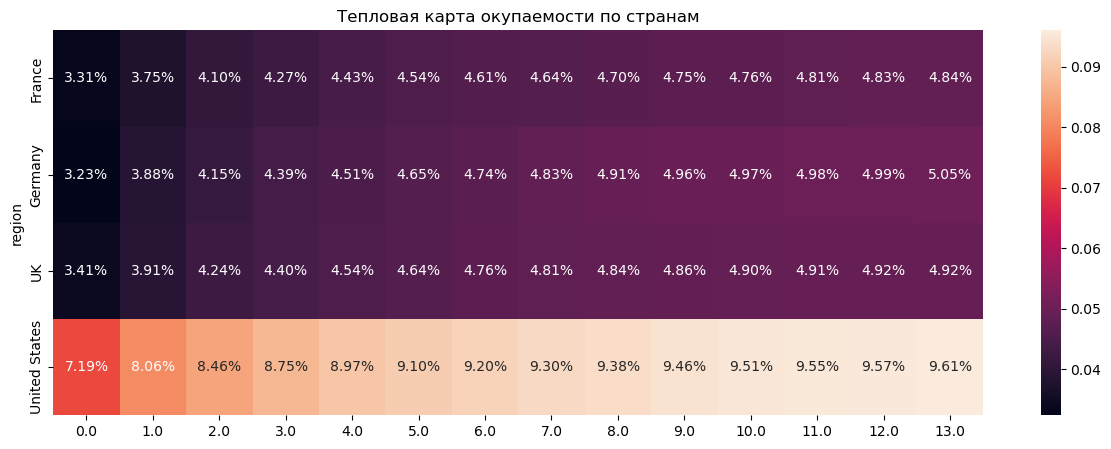

In [203]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта окупаемости по странам')
plt.show() 

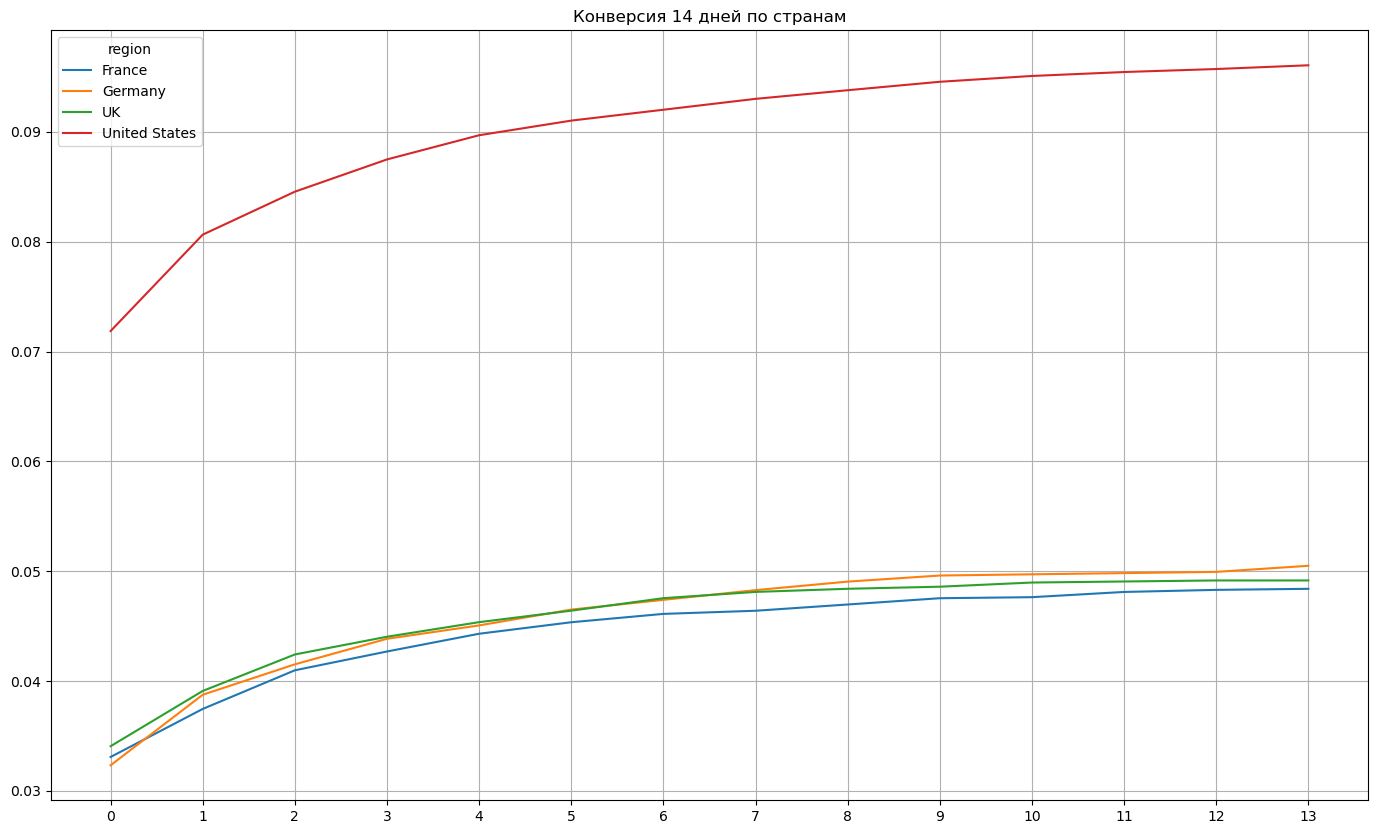

In [204]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)


report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(17, 10), xticks=list(report.columns.values)
)
plt.title('Конверсия 14 дней по странам')

plt.show() 

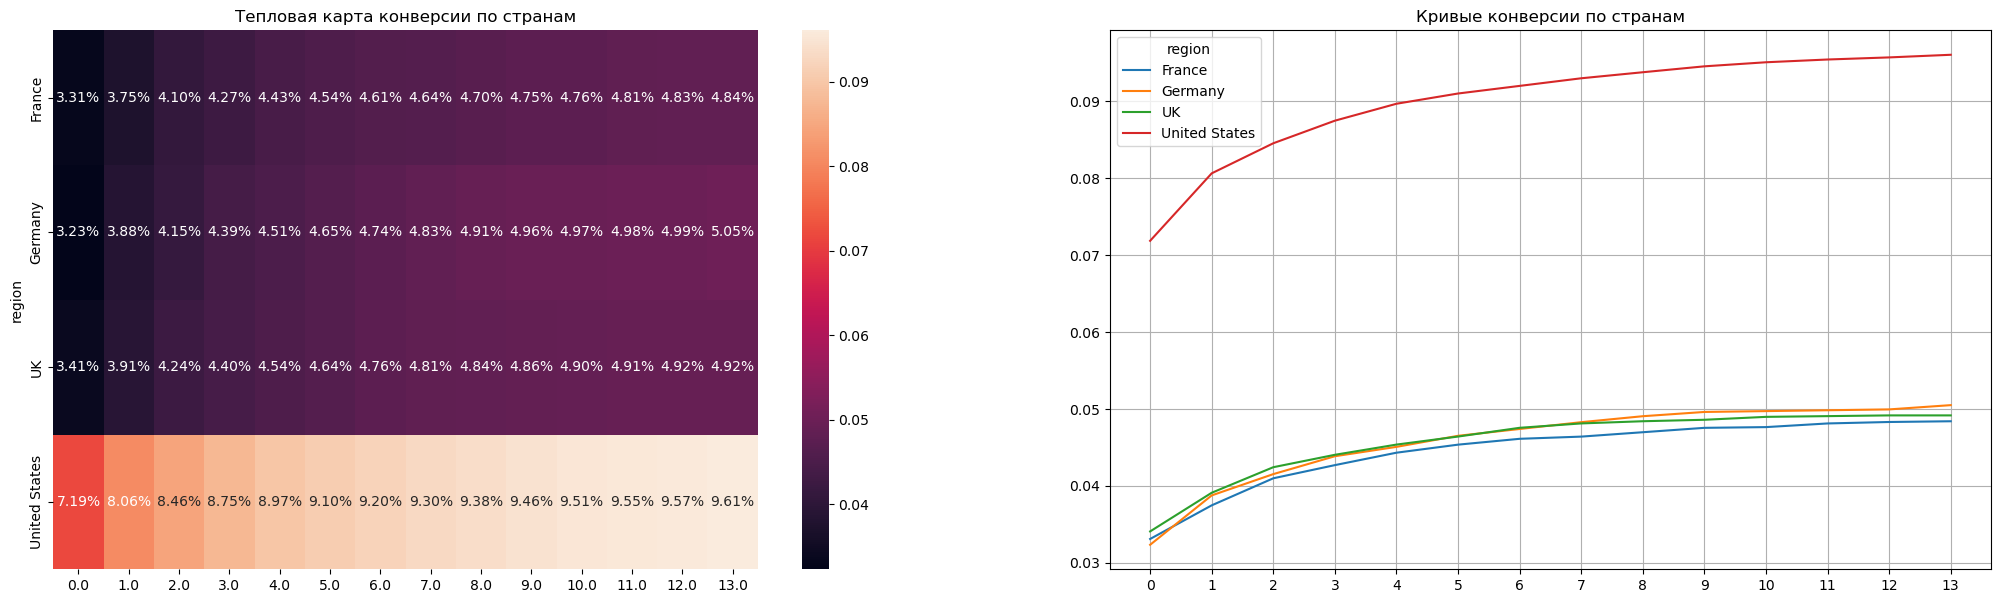

In [205]:
plt.figure(figsize = (25, 7)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по странам')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по странам')

plt.show() 

##### LTV, CAC, ROI

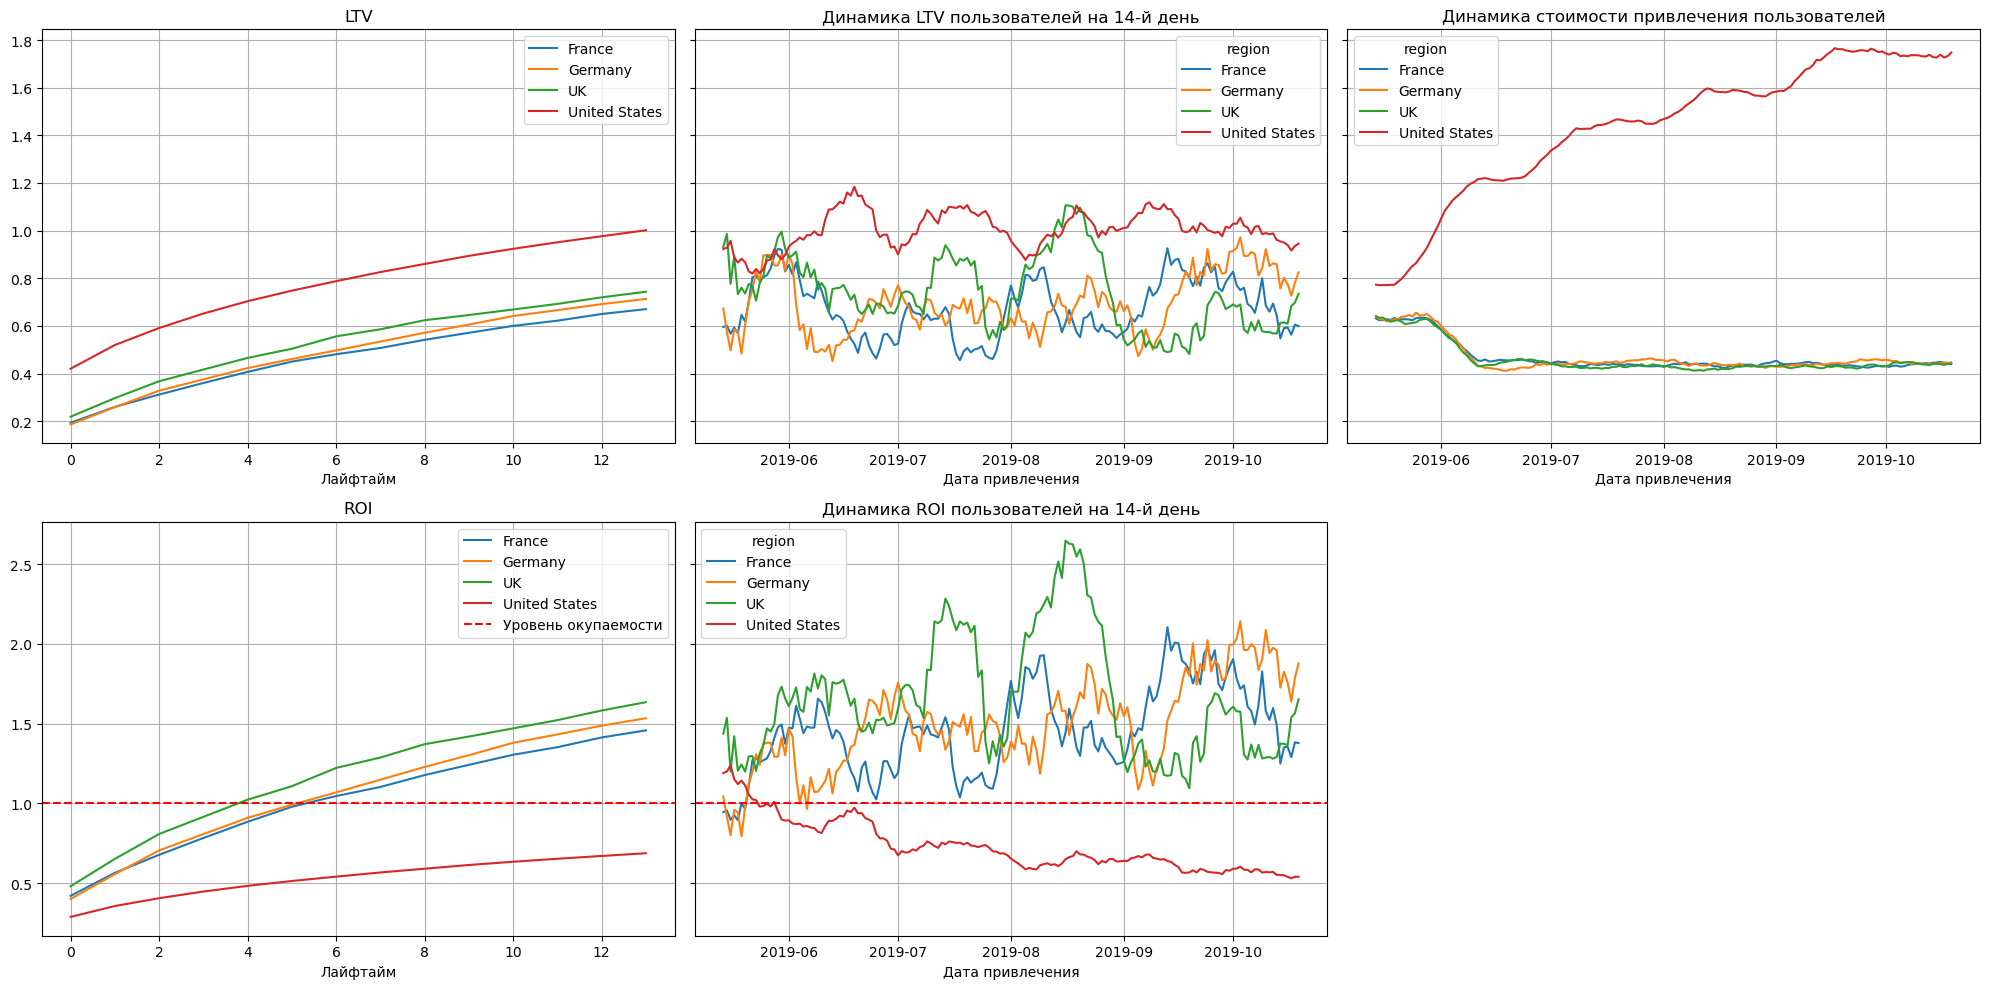

In [206]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)
plt.figsize=(20, 7)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

#####  Удержание по странам

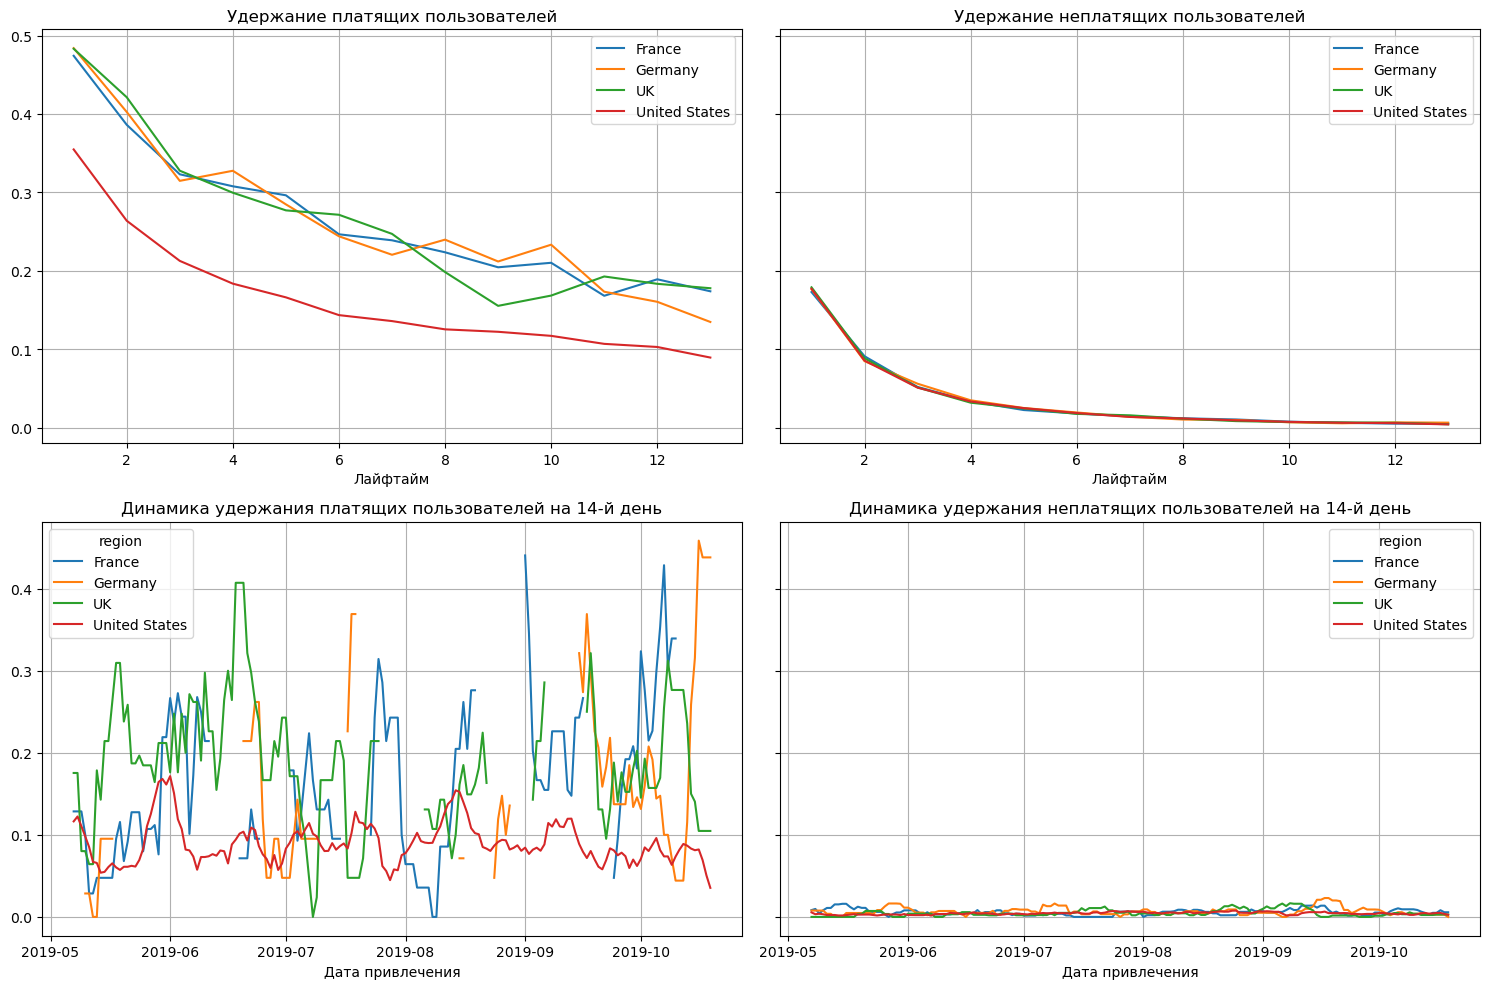

In [207]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

##### Промежуточный вывод 

1. Страны клиентов:

    - USA
    - UK
    - France
    - Germany
    
    
2. Конверсия по странам за исследуемый период:
    - USA: 7.19% новых клиентов в первый день, 9.61% в последний день
    - UK: 3.41% новых клиентов в первый день, 4.92% в последний день
    - France: 3.31% новых клиентов в первый день, 4.84% в последний день
    - Germany: 3.23% новых клиентов в первый день, 5.05% в последний день
    
Высокий показатель конверсии у клиентов из США. Конверсия остальных стран варьируется от 3,6% до 4%.

3. ROI (окупаемость инвестиций). Реклама окупается у жителей Великобритании, Франции и Германии. Явный страна-аутсайдер - США. Показатель приближается к границе окупаемости, но не пересекает ее. 

4. CAC (стоимость привлечения клиента). Значительно выделяется своим ростом у США, соответственно и затраты ан маркетинг самые высокие. САС Великобритании, Франции и Германии, практически одинаковый, также у этих трех стран виден сущесственный спад САС в начале июня, и с середны июня показатель был стабилен до конца года.

5. LTV (пожизненная ценность клиента) - Самый высокий показатель у жителей США. В Великобритании и Германии, практически одинаковые показатели. Нижняя граница у Франции.

6. Удержание. Показатель в Великбритании, Франции и Германии, практически однаковый, с периодическими скачками. США опять занимает строчку страны-аутсадера, но теперь уже по удержанию платящих пользователей. примечательно, что показатель всех стран, кроме США, скачкообразный. В это же время у США достаточно стабильный лайфтам клиентов, но находящийся на нижней границе.

#### Окупаемость по рекламным каналам

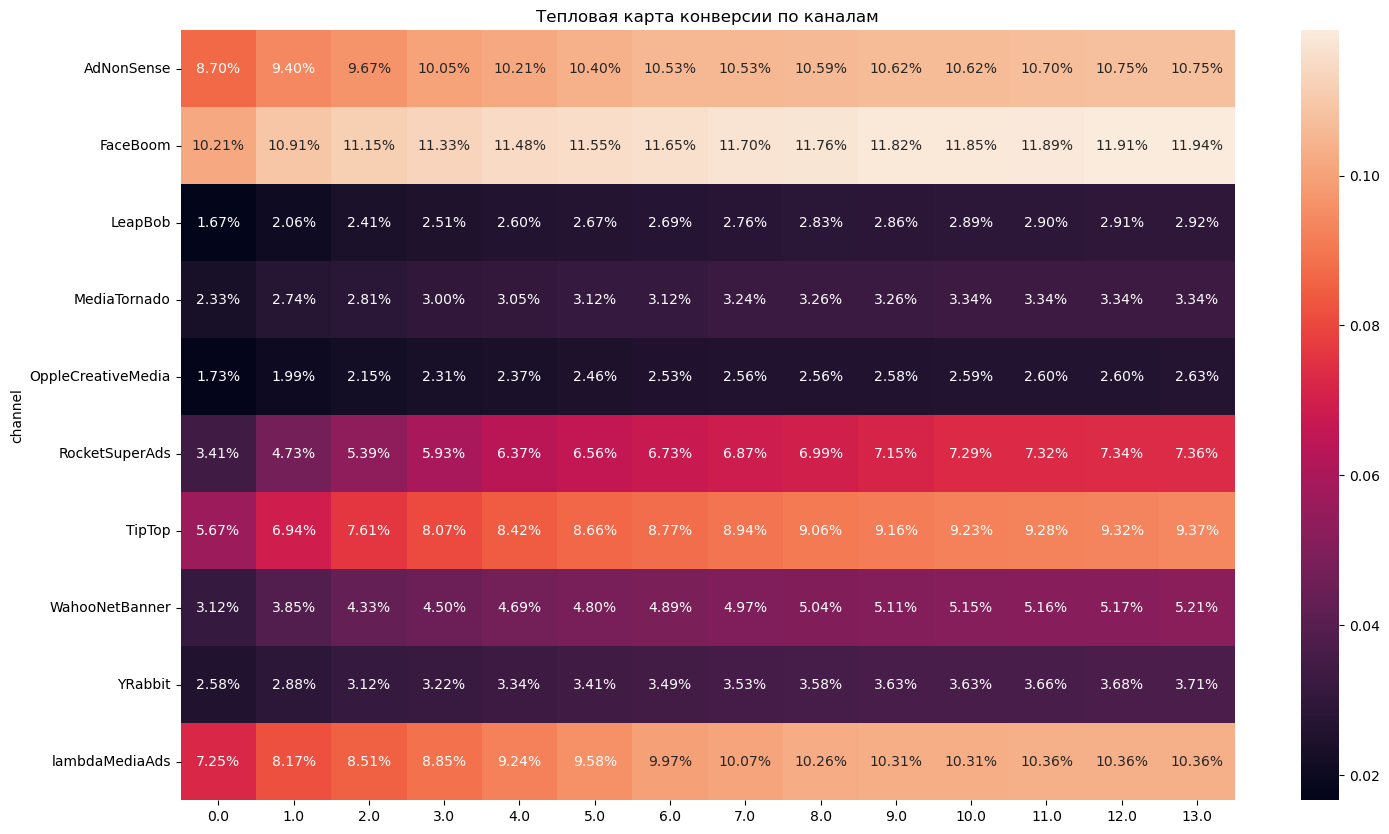

In [208]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(17, 10))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по каналам')
plt.show() 

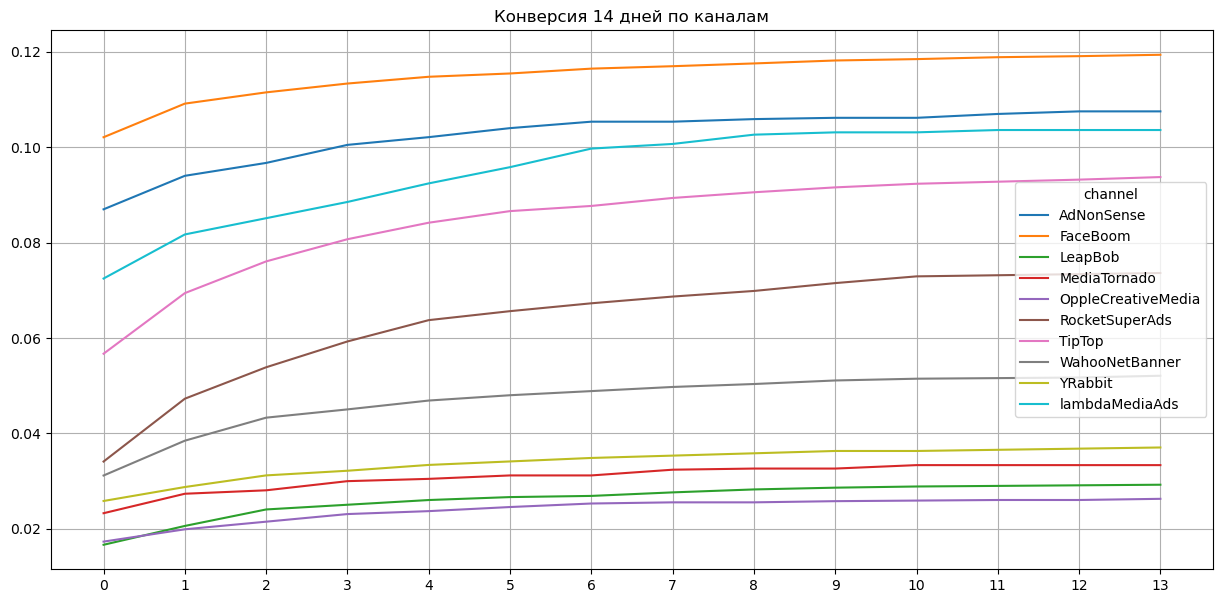

In [209]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)


report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    grid=True, figsize=(15, 7), xticks=list(report.columns.values)
)
plt.title('Конверсия 14 дней по каналам')

plt.show() 

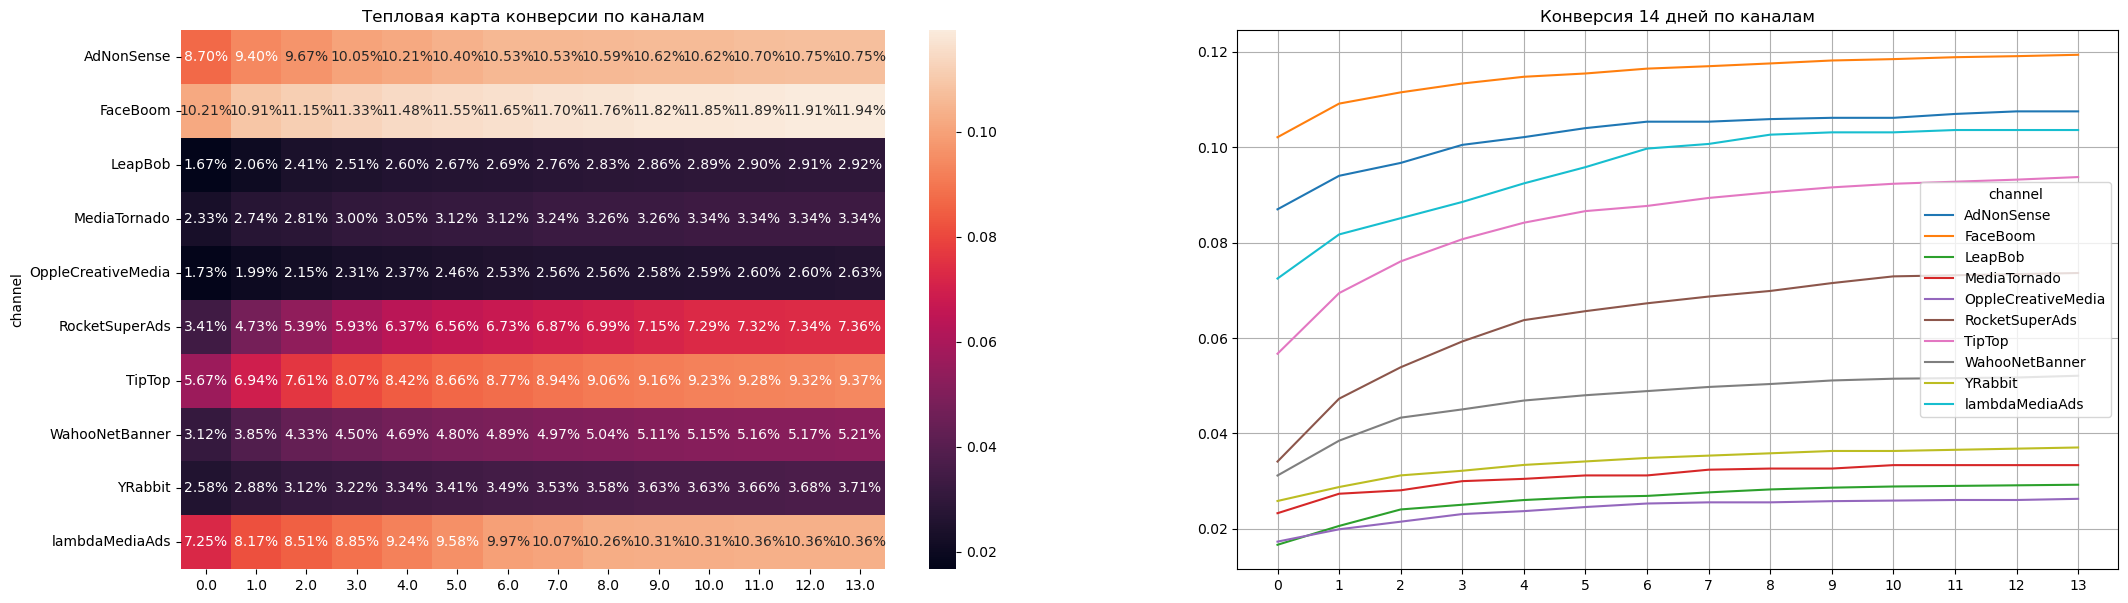

In [210]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(25, 7)) # размер сетки для графиков

report = conversion.drop(columns=['cohort_size'])

sns.heatmap(
    conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)
plt.title('Тепловая карта конверсии по каналам')

# для кривых конверсии исключаем размеры когорт

report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Конверсия 14 дней по каналам')

plt.show() 

##### LTV, CAC, ROI

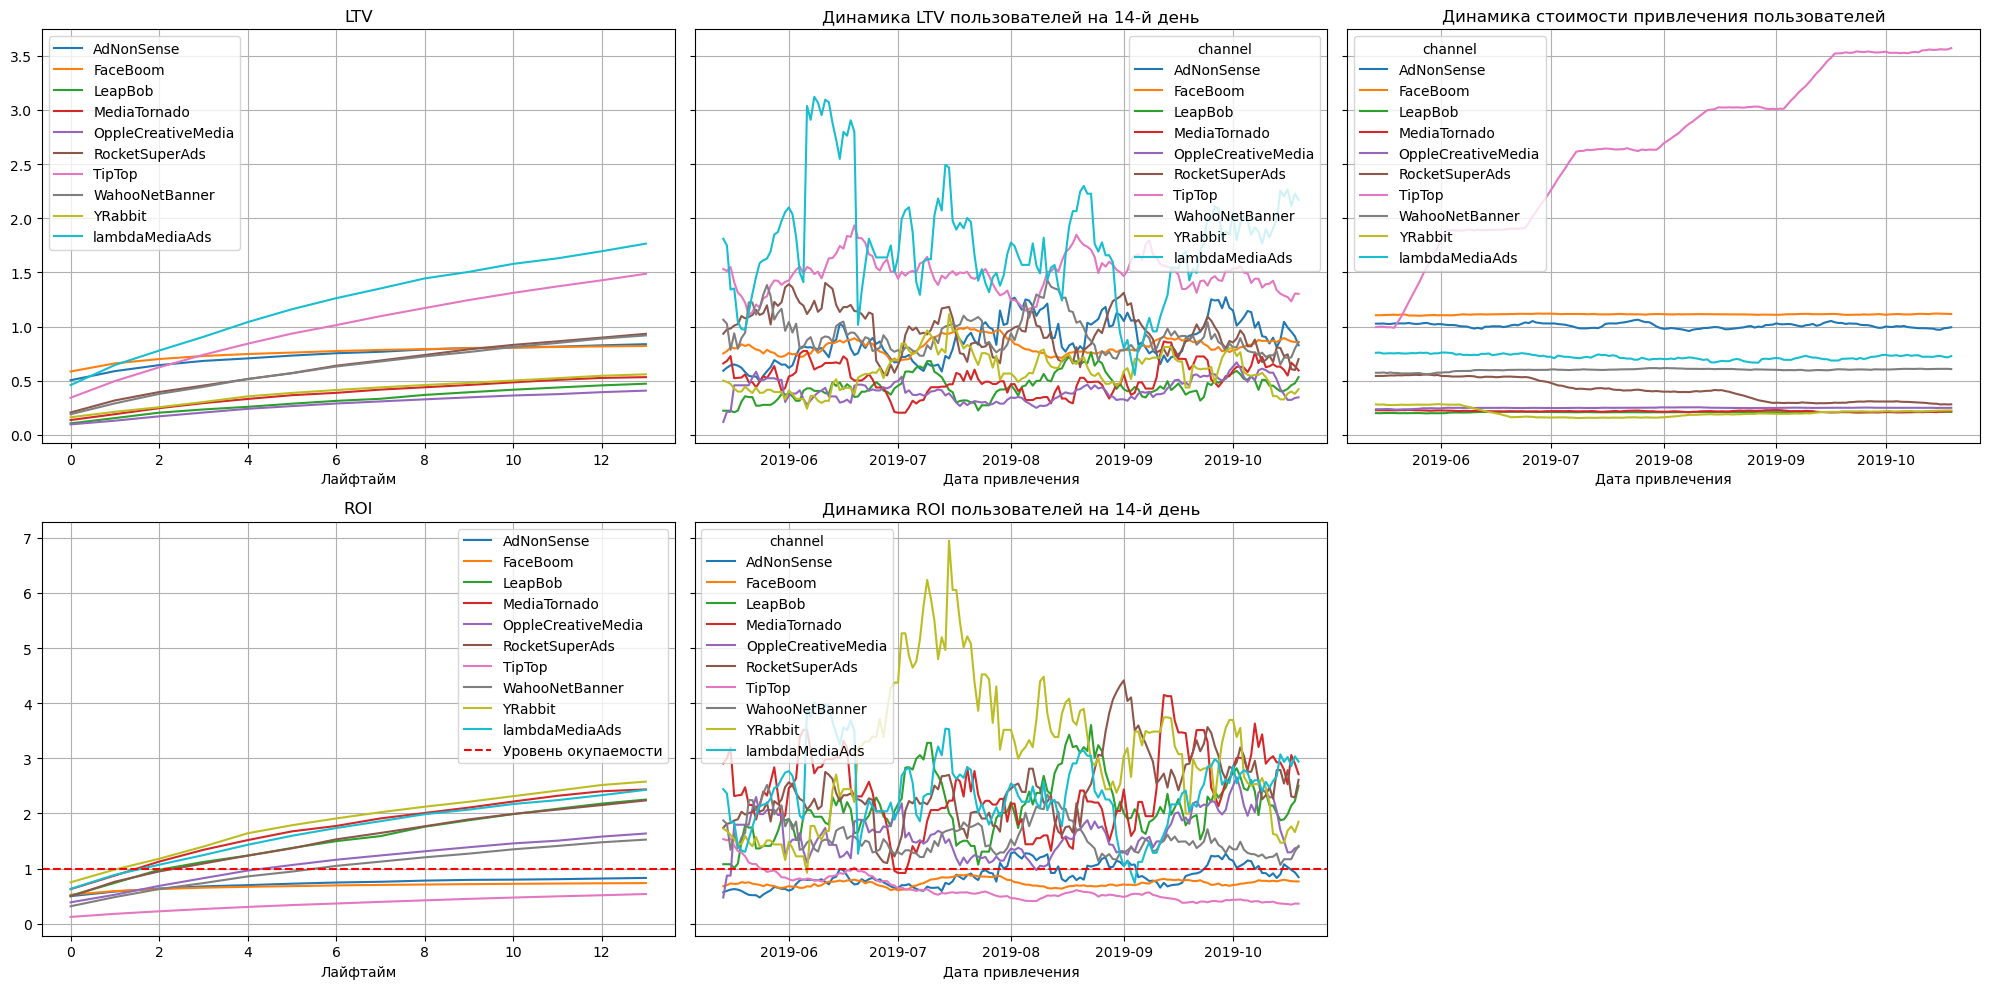

In [211]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)
plt.figsize=(20, 7)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

##### Удержание по каналам

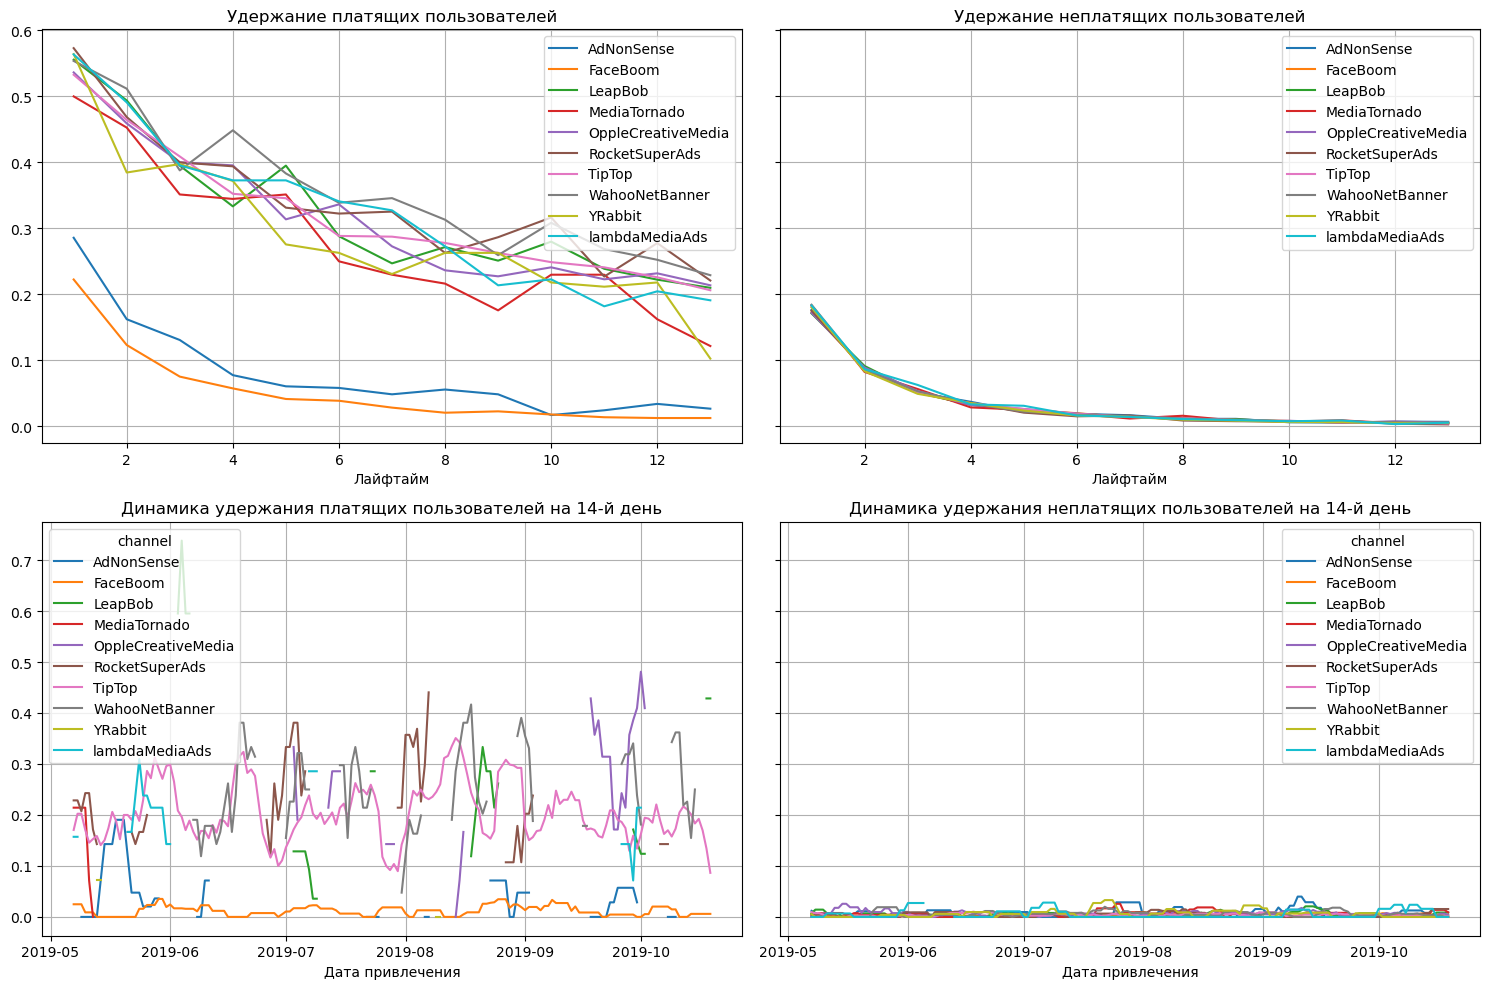

In [212]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

##### Промежуточный вывод

1. Определены 4 канала с наибольшей конверсией: 

    - FaceBoom - 10.21% новых клиентов в первый день, 11.94% в последний день
    - AdNonSense - 8.70% новых клиентов в первый день, 10.75% в последний день
    - LambdaMedia - 7.25% новых клиентов в первый день, 10.36% в последний день
    - TipTop - 5.67% новых клиентов в первый день, 9.37% в последний день
    
2. ROI (окупаемость инвестиций). Реклама окупается у всех каналов, кроме AdNonSense, FaceBoom, TipTop. Самый явный аутсайдер канал TipTop. 

3. CAC (стоимость привлечения клиента). У TipTop самый высокий и растущий показетель в теченеии иссследуемого периода. У остальных каналов, показатель стабилен. Стоимость варьируется.

4. LTV (пожизненная ценность клиента) - Самый высокий показатель у каналов LambdaMedia и TipTop.

5. Удержание. Самый низкий показатель удержания у каналов AdNonSense и FaceBoom.

6. Стоит отметить, что конверсия у FaceBoom лучшая, а удержание худшее.

#### Ответы на вопросы

##### Окупается ли реклама, направленная на привлечение пользователей в целом?

Реклама не окупается, к концу исследуемого периода ROI только приближался к 100%.
CAC (стоимость привлечения клиента) - увеличивается по всему исследуемому периоду. Соответственно увеличиваются затраты на маркетинг.
LTV (пожизненная ценность клиента) - на всем периоде достаточно стабилен.

##### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

1. Не окупаются клиенты, которые используют IPhone и Mac. 

2. В США, единственная страна, котороая не прошла границу окупаемости.

3. Канал TipTop, выделяется большой и растущей ценой за привлечение клиентов и самым низким показателем окупаемости. Данных канал привлечения - невыгодный. Так же, за границу окупаемости не вышли каналы AdNonSense, FaceBoom.

##### Чем могут быть вызваны проблемы окупаемости?

Возможно, проблемы окупаемости связаны с большими вложениями в рынок США и неэффективные каналы привлечения. Можно сделать упор на Европейский рынок. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

##### Причины неэффективности привлечения пользлователей

Большой акцент на рынок США.

Высокая стоимость инвестиций в рекламные каналы, которые в последствии не окупаются. Например FaceBoom имеет высокий показатель роста стоимости привлечения клеинта, и в тоже время, один из самых низких показателй удержания клиента.

Привлечение клиентов использующие IPhone и Mac дороже, чем у дргих утсройств. Но именно IPhone и Mac - не окупаются.

##### Рекомендации для отдела маркетинга

Сделать больший акцент на привлечение в Европейском рыноке.

Более равномерно распределить бюджет на рекламные кампании. Сократить для убыточних кампаний, увеличить для прибыльных. Т.к. большая часть кампаний окупается, возомжно с увеличением инвестиций в остальные компании появится новый или явный лидер окупаемости.

Иметь в виду устройства клиентов. По графикам видно, что более выгодное вложение в привлечение клиентов, это клиенты пользующиеся Android и PC.

**Основная проблема в каналах TipTop и FaceBoom, которые работают на рынке США.**

- У **FaceBoom** падает удержание клиентов. Конверсия самая высокая. Динамика САС стабильная на весь период
    - Рынок США самый массовый по пользователям приложения. Соответственно больше требуется инвестиций в рекламу. В США основными устройствами являются IPhone и Mac. По показателям окупаемости именно эти два устройства являются невыгодные по првилечению новых клиентов. Но конверсия у них большая. Исходя из вышеперечисленного, могу предположить, что имеет место быть технической ошибке. Следует сообщить техническому отделу FaceBoom. По крайней мере будет получен ответ с подтверждением данной гипотезы или опровержением.


- Удержание у **TipTop** хорошее, но цена на привлечение клиента растет, как "на дрожжах". Могу порекомендовать сократить объемы привлечения. т.к. показатель ROI не успевает угнаться за CAC. 